<a href="https://colab.research.google.com/github/Paschall03/Paschall03/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

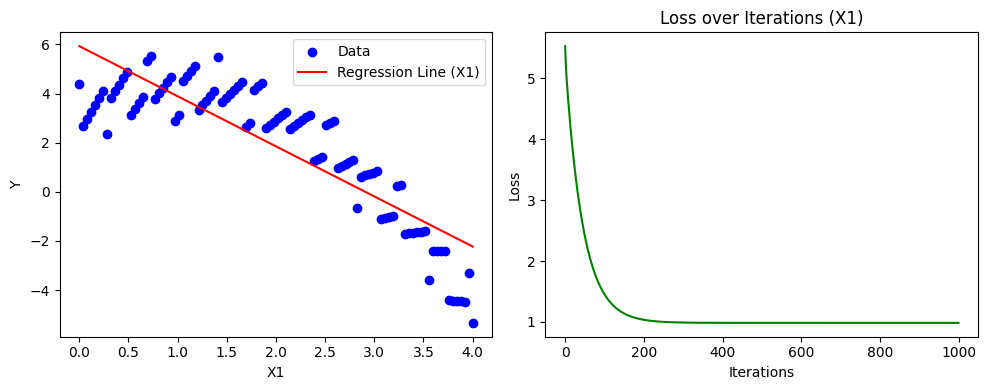

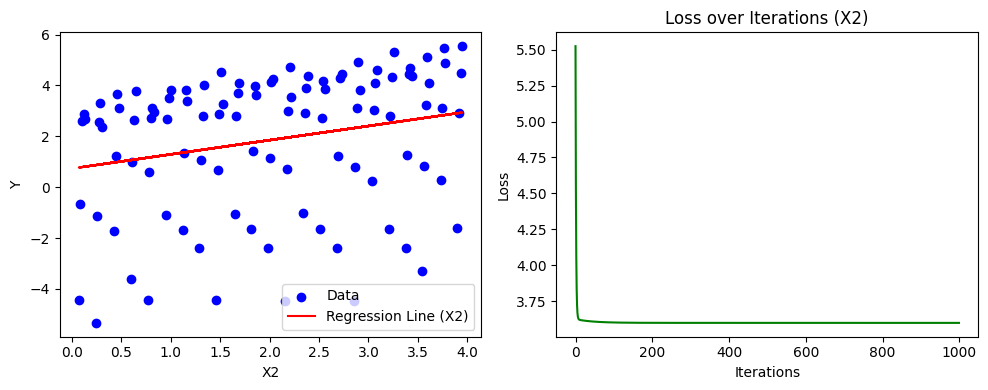

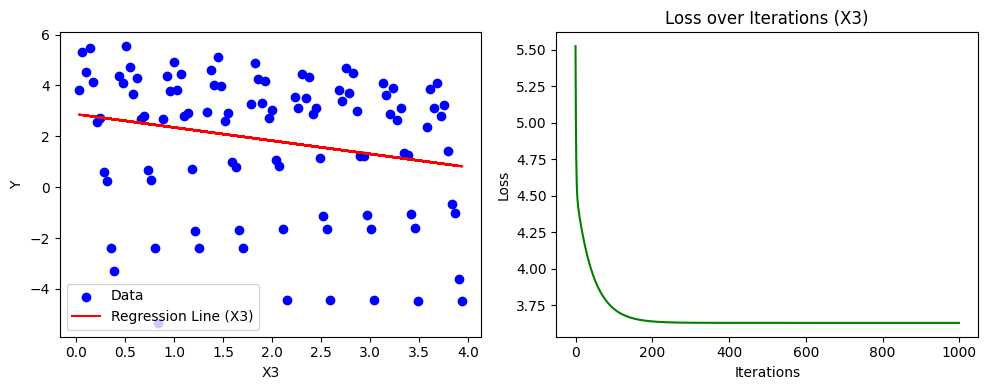

Model for X1: Y = 5.9279 + -2.0383 * X1
Final loss: 0.984993

Model for X2: Y = 0.7361 + 0.5576 * X2
Final loss: 3.599366

Model for X3: Y = 2.8714 + -0.5205 * X3
Final loss: 3.629451



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/D3.csv"
df = pd.read_csv(file_path)

df = df.dropna()

X1 = df.iloc[:, 0].values
X2 = df.iloc[:, 1].values
X3 = df.iloc[:, 2].values
Y = df.iloc[:, 3].values

def gradient_descent(X, Y, learning_rate=0.01, iterations=1000):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    loss_history = []

    for _ in range(iterations):
        y_pred = theta_0 + theta_1 * X
        error = y_pred - Y

        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        theta_0 -= learning_rate * grad_theta_0
        theta_1 -= learning_rate * grad_theta_1

        loss = (1/(2*m)) * np.sum(error**2)
        loss_history.append(loss)

    return theta_0, theta_1, loss_history

variables = {"X1": X1, "X2": X2, "X3": X3}
learning_rate = 0.05
iterations = 1000

results = {}
for var_name, X in variables.items():
    theta_0, theta_1, loss_history = gradient_descent(X, Y, learning_rate, iterations)
    results[var_name] = (theta_0, theta_1, loss_history)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='blue', label='Data')
    plt.plot(X, theta_0 + theta_1 * X, color='red', label=f'Regression Line ({var_name})')
    plt.xlabel(var_name)
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), loss_history, color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss over Iterations ({var_name})')

    plt.tight_layout()
    plt.show()

for var_name, (theta_0, theta_1, loss_history) in results.items():
    print(f"Model for {var_name}: Y = {theta_0:.4f} + {theta_1:.4f} * {var_name}")
    print(f"Final loss: {loss_history[-1]:.6f}\n")


Problem 2

Final model: Y = 5.3124 + -2.0035*X1 + 0.5328*X2 + -0.2653*X3
Final loss: 0.738464



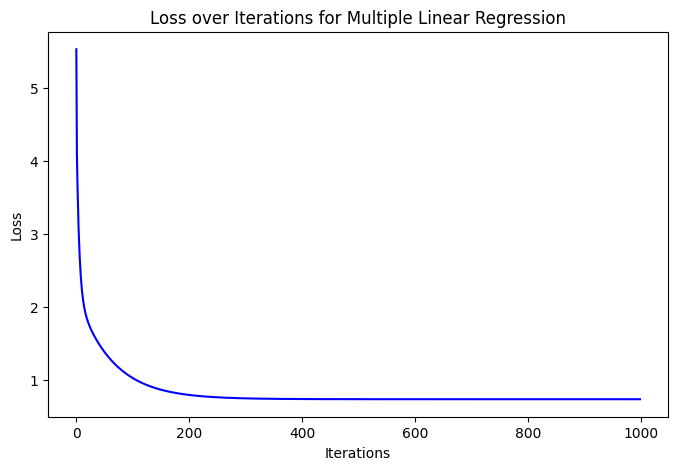

Prediction for (X1=1, X2=1, X3=1): Y = 3.5765
Prediction for (X1=2, X2=0, X3=4): Y = 0.2441
Prediction for (X1=3, X2=2, X3=1): Y = 0.1024


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/D3.csv"
df = pd.read_csv(file_path)

df = df.dropna()

X = df.iloc[:, 0:3].values
Y = df.iloc[:, 3].values

def gradient_descent_multi(X, Y, learning_rate=0.05, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n + 1)
    X = np.c_[np.ones(m), X]
    loss_history = []

    for _ in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - Y

        gradients = (1/m) * X.T.dot(error)

        theta -= learning_rate * gradients

        loss = (1/(2*m)) * np.sum(error**2)
        loss_history.append(loss)

    return theta, loss_history

learning_rate = 0.08
iterations = 1000
theta, loss_history = gradient_descent_multi(X, Y, learning_rate, iterations)

print(f"Final model: Y = {theta[0]:.4f} + {theta[1]:.4f}*X1 + {theta[2]:.4f}*X2 + {theta[3]:.4f}*X3")
print(f"Final loss: {loss_history[-1]:.6f}\n")

plt.figure(figsize=(8, 5))
plt.plot(range(iterations), loss_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Multiple Linear Regression')
plt.show()

new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values = np.c_[np.ones(new_values.shape[0]), new_values]
y_predictions = new_values.dot(theta)

for i, (x1, x2, x3) in enumerate([[1, 1, 1], [2, 0, 4], [3, 2, 1]]):
    print(f"Prediction for (X1={x1}, X2={x2}, X3={x3}): Y = {y_predictions[i]:.4f}")
